Lien vers l'article de Jaddo : <http://www.jaddo.fr/2016/06/19/et-mes-fesses-elles-sont-roses-mes-fesses/>.

# L'exemple de Jaddo

> La probabilité qu’a l’examen de bien trouver l’anomalie s’il y en a une s’appelle la **sensibilité**.

> La probabilité qu’a l’examen d’être normal quand il n’y a pas d’anomalie s’appelle la **spécificité**.

Valeurs d'exemple :

- sensibilité : 90 %
- spécificité : 95 %

In [4]:
n = 100000
sensi = 0.90
speci = 0.95
preva = 0.01
sick = n * preva
healthy = n - sick
true_pos = sick * sensi
false_neg = sick * (1 - sensi)
true_neg = healthy * speci
false_pos = healthy * (1 - speci)
true_pos, false_neg, true_neg, false_pos

(900.0, 99.99999999999997, 94050.0, 4950.000000000005)

> La probabilité que vous ayez vraiment une anomalie si le test dit qu’il y en a une, ça s’appelle la **valeur prédictive positive**. (**VPP** pour les intimes).

> La probabilité que vous n’ayez pas d’anomalie si le test dit que tout va bien, ça s’appelle la **valeur prédictive négative** (**VPN**).

In [7]:
vpp = true_pos / (true_pos + false_pos)
vpn = true_neg / (true_neg + false_neg)
vpp, vpn

(0.15384615384615372, 0.9989378651088688)

# Interactif 

In [1]:
from ipywidgets import interact

In [25]:
@interact
def crunch_numbers(sensi=(0, 1., 0.01), speci=(0, 1., 0.01), preva=(0, 1., 0.01)):
    """Calcul et arbre des différents chiffres."""
    n = 100000
    sick = n * preva
    healthy = n - sick
    true_pos = sick * sensi
    false_neg = sick * (1 - sensi)
    true_neg = healthy * speci
    false_pos = healthy * (1 - speci)
    vpp = true_pos / (true_pos + false_pos)
    vpn = true_neg / (true_neg + false_neg)
    print('sick: {:n}, healthy: {:n}'.format(sick, healthy))
    print('true_positives: {:n}, false_negatives: {:n}'.format(true_pos, false_neg))
    print('true_negatives: {:n}, false_positives: {:n}'.format(true_neg, false_pos))
    print('vpp: {:.2f}, vpn: {:.2f}'.format(vpp, vpn))

# Un graphique en 2d 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
sensi_grid = np.linspace(0.01, 1, num=50)[:, np.newaxis] 
speci_grid = np.linspace(0.01, 1, num=100)[np.newaxis, :]

In [36]:
n = 100000
sick = n * preva
healthy = n - sick
true_pos = sick * sensi_grid
false_neg = sick * (1 - sensi_grid)
true_neg = healthy * speci_grid
false_pos = healthy * (1 - speci_grid)
vpp = true_pos / (true_pos + false_pos)
vpn = true_neg / (true_neg + false_neg)

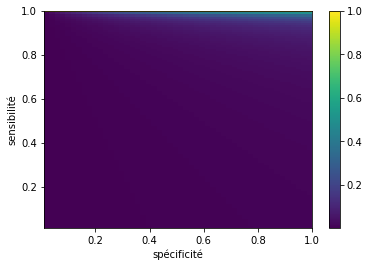

In [51]:
plt.imshow(vpp.T, aspect='auto', origin='lower', 
           extent=(sensi_grid.min(), sensi_grid.max(), speci_grid.min(), speci_grid.max()))
plt.colorbar()
plt.xlabel('spécificité')
plt.ylabel('sensibilité')

On le rend interactif :

In [55]:
@interact
def vpp_vpn_plot(preva=(0.01, 1, 0.01)):
    n = 100000
    sick = n * preva
    healthy = n - sick
    true_pos = sick * sensi_grid
    false_neg = sick * (1 - sensi_grid)
    true_neg = healthy * speci_grid
    false_pos = healthy * (1 - speci_grid)
    vpp = true_pos / (true_pos + false_pos)
    vpn = true_neg / (true_neg + false_neg)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(vpp.T, aspect='auto', origin='lower', 
           extent=(sensi_grid.min(), sensi_grid.max(), speci_grid.min(), speci_grid.max()))
    plt.colorbar()
    plt.xlabel('spécificité')
    plt.ylabel('sensibilité')
    plt.title('VPP')
    
    plt.subplot(122)
    plt.imshow(vpn.T, aspect='auto', origin='lower', 
           extent=(sensi_grid.min(), sensi_grid.max(), speci_grid.min(), speci_grid.max()))
    plt.colorbar()
    plt.xlabel('spécificité')
    plt.ylabel('sensibilité')
    plt.title('VPN')

    plt.tight_layout()
    plt.show()

# sankey ? 

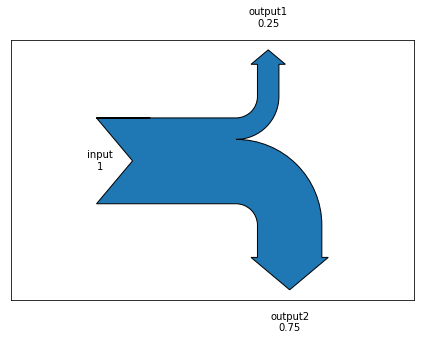

In [76]:
from matplotlib.sankey import Sankey
sankey = Sankey(scale=0.4)
sankey.add(flows=[1, -0.25, -0.75],
       labels=['input', 'output1', 'output2'],
          orientations=[0, 1, -1])
sankey.finish()
plt.tight_layout()